In [5]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

# Clustering

In [13]:
X, y = make_moons(n_samples=500, noise=0.05)

In [14]:
X.shape

(500, 2)

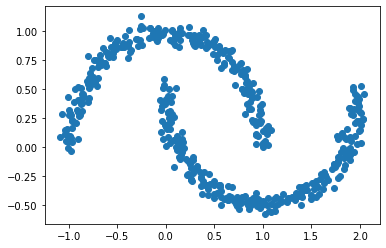

In [17]:
plt.scatter(X[:, 0], X[:, 1]);

In [16]:
from sklearn.cluster import KMeans, SpectralClustering

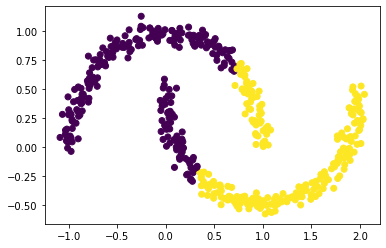

In [19]:
cls1 = KMeans(n_clusters=2)
y_pred1 = cls1.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred1);

/Users/khamir/opt/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


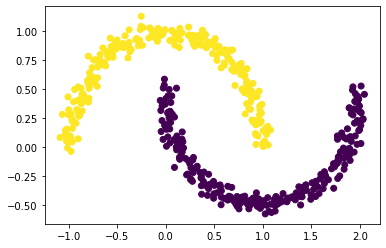

In [22]:
cls2 = SpectralClustering(n_clusters=2, affinity='nearest_neighbors')
y_pred2 = cls2.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred2);

# Segmentation

In [70]:
from skimage import data
from skimage.io import imread
from sklearn.feature_extraction import image
from skimage.transform import rescale
from sklearn.cluster import spectral_clustering

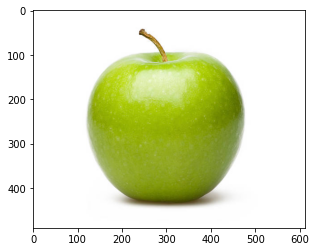

In [75]:
img = imread('apple.jpeg')
plt.imshow(img);

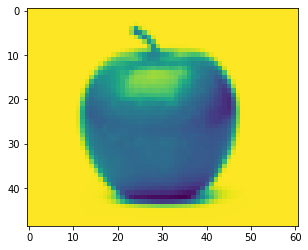

In [113]:
r_img = rescale(img, 0.1)
r_img = np.reshape(r_img, (r_img.shape[0], r_img.shape[1]))
plt.imshow(r_img);

In [114]:
mask = np.reshape(r_img.astype(bool),
                  (r_img.shape[0], r_img.shape[1]))

In [121]:
graph = image.img_to_graph(img=r_img, mask=mask)

graph.data = np.exp(-20*graph.data/graph.data.std())

labels = spectral_clustering(graph,
                             n_clusters=2,
                             eigen_solver='arpack')

img_label = np.zeros(mask.shape)
img_label[mask] = labels

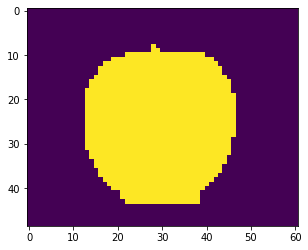

In [123]:
plt.imshow(img_label);